# What is Feature Engineering?


Feature engineering is the process of using data domain knowledge to create features or variables that make machine learning algorithms work more efficiently. It’s a fundamental task for improving machine learning model performance and prediction accuracy.

Feature engineering includes a number of processes, like

- filling missing values within a variable
- encoding categorical variables into numbers
- variable transformation
- creating or extracting new features from the ones available in your data

## Why Feature Engineering?

At the start of every machine learning project, raw data will inevitably be messy and unsuitable for training a model. The first step is always data exploration and cleaning, which involves changing data types and removing or imputing missing values.

With a certain understanding of the data acquired through exploration, though, we can solve these challenges and build high-performing models.

This may include removing outliers or specific features you don’t want the model to learn, as well as creating features from the data that represent the underlying problem better.

However, it’s important to understand that predictive analytics is not magic, and although an algorithm learns on a very basic level, it can only extract meaning from the data you give it. Algorithms don’t have the wealth of intuition that humans have (whether that’s good or bad), and consequently, the success of an algorithm can often hinge on how you engineer the input features.

This series is divided into sections—here are brief descriptions of each of the sections:

- Feature Types: Or variables types—we'll learn about continuous, discrete, and categorical variables (which can be nominal or ordinal), alongside time-date and mixed variables.

- Common Issues: This post will discuss different issues you’ll see in real-world datasets like missing data, data imputations, variable distribution, outliers, and others.

- Dealing with Missing Values: We’ll examine the major techniques used to fill the missing data in your dataset.

- Categorical Encoding: This post will discuss the different techniques to transform categorical variables into numbers—frequency encoding, one-hot encoding, and more.

- Feature Transformation: We’ll explore the mathematical transformations you can apply to alter the distribution of numerical variables, like logarithmic or reciprocal transformations.

- Variable Discretization: This article looks at the procedures to discretize variables, like equal-width, equal-frequency, discrete decision using decision trees, clustering and more.

- Dealing with Outliers: This post will show how to identify outliers and remove them from your dataset.

- Feature Scaling: We’ll cover several techniques to scale features, like standardization, scaling to the minimum and maximum, scaling to the unit length of the vector, and more.

- Handling Time-Date and Mixed Variables: Various ways to create new features from date, time, and mixed variables.

## What is variable?

A variable is any characteristic, number, or quantity that can be measured or counted. We call them variables because the values they take may vary, and usually do.

The following are examples of variables:

- Age (23, 52, 60, …).
- Gender (male, female)
- Country of birth (Algeria, USA, Japan, …)
- Eye color (green, brown, blue, and purple maybe)
- Vehicle Brand (Buggati, Ferrari)

We classify variables in a dataset into one of these major types:

- Numerical variables
- Categorical variables
- Datetime variables
- Mixed variables

In [1]:
# You ab get the type of each variable from a Pandas dataframe 
import pandas as pd
data = pd.read_csv('titanic_train.csv')
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### Numerical Variables

The values of numerical variables are (predictably) numbers. For example, total rainfall measured in inches, heart rate, the number of cheeseburgers consumed in an hour—all numerical values.

We can further classify them into:

- Continuous variables
- Discrete variables

##### Continuous Variable

A continuous variable is one that can take on an uncountable set of values. It may contain any value within a given range.

- For example, the total amount paid by a customer in a supermarket is continuous. The customer can pay $20, $16.50, $150, and so on.

Other examples of continuous variables are:

- House prices (7700$, 83100$, 500$)
- Time spent shopping (1.5 hours, 30 minutes)
- A person’s weight (98.2 Kg, 60 Kg)

To visualize such a variable we have a range of options, including:

- Density plot
- Histogram
- Box plot
- Scatter plot.

### Discrete Variable

A discrete variable is a variable that can only take on a finite number of values, and these values are integers ( — which means numbers that are not a fraction), they are counts.

- For example, the number of things bought by a customer in a supermarket is discrete. The customer can buy 2, 20, or 150 things, but not 10.4 items. It is always a round number.

The following are also examples of discrete variables:

- Number of active bank accounts for a given client (1, 4, 7)
- Number of pets in a family
- The number of connected devices in a network

To visualize such discrete variables, you can use the following type of plots:

- Count plot
- Pie chart

## Categorical Variables

The values of a categorical variable are selected from a group of categories, also called labels. Examples are gender (male or female) and marital status (never married, married, divorced, or widowed).

Other examples of categorical variables include:

- Gender (male, female)
- Mobile network provider (Mobilis, Vodafone, Orange)
- City name (Tiaret, Algiers, Texas, Dubai)

We can further categorize categorical variables into:

- Ordinal variables
- Nominal variables

### Ordinal Variable

Ordinal variables are variables that exist within meaningfully ordered categories. For example:

- Student grades on an exam (A, B, C, or F).
- Days of the week (Sunday, Monday, Tuesday, …)

### Nominal Variable

For nominal variables, there isn’t a natural order in the labels. For example, country of birth—with Algeria, USA, South Korea as values—is also categorical, but how they’re ordered doesn’t typically matter.

Other examples of nominal variables:

- Car color (blue, grey, silver)
- Car make(Citroen, Peugeot)
- City (Tiaret, Cairo, Dubai)

There’s nothing that indicates a natural order of the labels, and in principle, they are all equal.

To consider: In some scenarios, categorical variables are coded as numbers when the data was recorded (for example, they coded gender as 0 for males and 1 for females). In these case, the variable is still categorical, despite the use of numbers— this number is just a label.

### Dates and Times

A particular type of categorical variable are those that take dates or time as values.

For example:

- Date of birth (16–04–1997, 12–01–2012)
- Date of application (2020-Jan, 2022-Feb)

Datetime variables can contain dates only, time, or date and time.

We don’t usually work with datetime variables in their raw format because:

Date variables contain a considerable number of different categories
We can extract much more information from datetime variables by pre-processing them correctly.

Besides that, sometimes date variables contain dates that were not present in the dataset used to train the machine learning model.

Similarly, date variables can also contain dates placed in the future, with respect to the dates in the training dataset.

Therefore, the machine learning model can’t understand what to do with these dates because it never saw them while being trained.

In ensuing posts, we’ll cover different techniques for engineering datetime variables.

### Mixed Variables

Finally, mixed variables are those whose values can contain both numbers and labels.

For a variety of reasons, mixing variables can occur in a given dataset, especially when filling its values.
Consider this common example:

- Let's say we have a number of something, like the income, or the number of children.

- Now let us say that this number could not be retrieved, for a variety of reasons, like we can’t income of a person because he committed to filling it when we did our survey to gather the data.

- In this case, we can return a label, and this label can represent the reason behind the issue, like ERROR_OMMIT for client omit to answer.

- So for some rows, this variable will hold a number that represents the income, and for others, the variable will contain the label ERROR_OMMIT, and that's a mixed variable.

## Common Issue in dataset

In machine learning, a dataset can have many features; and among these features, many issues can appear, ranging from missing data to outliers. These concerns need to be addressed before feeding features into a machine learning model.

In this post, we’ll explore feature characteristics that need to be addressed before building any machine learning model; We’ll also learn how to identify these kinds of characteristics and how they can significantly impact machine learning models.

Here are the general issues we can encounter in a given dataset:

- Missing data
- Categorical variable — cardinality
- Categorical variable — rare labels
- Linear model assumptions
- Variable distribution
- Outliers
- Feature magnitude

### MISSING DATA


Missing data occurs when no data is stored for a particular observation in a variable—so basically, missing data is just what it sounds like, the absence of data.

This is a common issue in most datasets, and it could have an important impact on the judgments that we can derive from that data.
Data can be missing for multiple reasons:

- Lost: A value is missing because it was forgotten, omitted, lost, or not stored properly.

- Doesn’t exist: e.g., a variable is created from the division of 2 variables, and the denominator takes 0.

Many of the features in a given dataset aren’t mandatory when being initially collected; therefore, those values can be missing if a user doesn’t fill them out—the reasons for omitting information in this way can vary.

To solve this issue, we need to use missing data imputation techniques, but these techniques may distort the original variable distribution. Additionally, they may alter the way variables interact with each other. Consequently, these distortions might affect the machine learning model’s performance, since many models make assumptions about the variable distribution.

We need to be careful when choosing the right missing data imputation technique.

To decide which methods we’ll use to handle missing data, we need to understand the mechanisms by which the data is missing. Three main mechanisms lead to missing data:

- Missing data completely at random (MCAR): The probability of being missing is the same for all the observations. There’s no relationship between the data missing and any other values, observed or missing, within the dataset, and disregarding those cases would not bias the inferences made.

- Missing data at random (MAR): The probability of an observation being missing depends on available information.

- Missing data not at random (MNAR): There is a mechanism or a reason why missing values are introduced in the dataset.

#### Categorical Variable — Cardinality

The values of a categorical variable are selected from a group of categories, also called labels. The number of different labels is known as cardinality.

Take, for example, the new COVID-19 result variables—the cardinality of this variable is two (2) because the results contain only two labels, positive or negative.

Can this cardinality affect our models? Yes, multiple labels in a categorical variable is a problem. Here are a few reasons why:
We need to transform those labels into numbers. Categories must be encoded as numbers, and encoding techniques impact feature space and variable interactions.

There can be an uneven distribution between the train and test sets. For highly cardinal variables, some labels may appear only in the train set, and that will cause over-fitting.

Some labels may appear only in the test set, which means the model can’t possibly know how to interpret these labels.

Variables with too many labels tend to dominate over those with fewer labels, particularly in tree-based algorithms. A significant number of labels within a variable may introduce noise in the dataset, so reducing cardinality may help improve model performance.

Models learn from the labels seen in the training set. But for new, unseen labels, models are unable to perform any calculations, resulting in errors.

#### Categorical Variable — Rare Labels

Rare labels are those that appear only in a small proportion of the observations in a dataset.

For example, for the variable “city” where a US citizen lives:
Chicago is a frequent category (many people live in Chicago)
Whiteville, North Carolina is a rare category (few people live there)

Here are some impacts and considerations on rare labels:

Rare labels may cause overfitting and generalization problems.

Hard to understand the role of the rare label in the final prediction.

#### Linear Model Assumptions

Linear models make some assumptions regarding data. These assumptions can be summarized as follows:

- Linearity

The relationship between the variables (Xs)and the target (Y) is linear:

This linear relationship can be assessed with scatter plots.

- Homoscedasticity

The independent variables have the same variance, also known as homogeneity of variance. There are tests and plots to determine homoscedasticity, like:

- Residuals plot
- Levene’s test
- Barlett’s test

If we have data where homoscedasticity is not satisfied, we can perform non-linear transformations (e.g., logarithm-transformation) or feature scaling to improve the homogeneity of variance.

- Normality

For any fixed value of a variable in a dataset, the target is normally distributed, which means that the variables follow a Gaussian distribution.

We can assess normality with histograms and Q-Q plots. Here’s an example of a Q-Q plot:

When the variable does not have a normal distribution, a non-linear transformation (e.g., logarithm-transformation) may fix this issue.

- Independence

the observations are independent of each other (no observation can affect another one).

#### Variable Distribution

Probability distribution or variable distribution is a function that describes the likelihood of obtaining the possible values that a variable can take.

Take, for example, the variable height. The probability distribution of this variable describes how often we can get a value of 161 cm, or 174 cm, or 200 cm. As you can probably guess, it’s more likely to obtain values between 161 –170 cm, than values around or bigger than 200 cm.

Properties of probability distributions

P(x) is the likelihood that the random variable takes a specific value of x.

The sum of all probabilities for all possible values must equal 1.
The probability for a particular value or range of values must be between 0 and 1.

Different probability distributions

- Discrete, like Binomial and Poisson.
- Continuous, like Gaussian, skewed, and many others.

Distributions and model performance

Linear models assume that the independent variables have a normal distribution.

Other models do not assume the distribution of variables. However, a better spread of the values may improve their performance.

#### Outliers

An outlier is a data point that’s significantly different from the remaining data.

Another way of saying this is that an outlier is an observation that deviates so much from the other observations, it arouses suspicion that it was produced by a different mechanism.

So with that, should outliers be removed? That depends on the context— outliers either deserve special attention or are simply ignored entirely.

The algorithms susceptible to outliers are mostly linear models.

Detecting Outliers

We can use an extreme value analysis with a normal distribution to detect outliers:

- Approximately 99% of the observations of a normally-distributed variable lie within the mean ±3 × standard deviations.
- Values outside mean ±3 ×standard deviations are considered outliers.

This can be easily visualized using the box plot 

### Feature magnitude

Feature values in a given dataset can vary widely. Imagine you have a dataset that has a column for age and another one for income—the range of these two variables is so different. This is called feature magnitude.

Feature magnitude matters because:

The scale of the variable directly influences the regression coefficients.

Variables with a more significant magnitude range (income, for example) dominate over the ones with a smaller magnitude range (age).

Gradient descent converges faster when features are on similar scales.

Feature scaling helps decrease the time to find support vectors for SVMs.

Euclidean distances are sensitive to feature magnitude.

Models affected by feature magnitude:

- Linear and logistic regression
- Neural networks
- Support vector machines
- K-nearest neighbors
- K-means clustering
- Linear discriminant analysis (LDA)
- Principal component analysis (PCA)

Tree-based models that are insensitive to feature magnitude:

- Classification and regression trees
- Random forests
- Gradient-boosted trees

## Data Imputation

Data imputation is the act of replacing missing data with statistical estimates of the missing values.

The goal of any imputation technique is to produce a complete dataset to use in the process of training machine learning models.

### Missing Data Imputation Techniques

We’re going to dive into techniques that apply to numerical and categorical variables, and also some methods that apply to both:

##### Numerical Variables

- Mean or median imputation
- Arbitrary value imputation
- End of tail imputation

#### Categorical Variables

- Frequent category imputation
- Add a missing category

#### Both
- Complete case analysis
- Add a missing indicator
- Random sample imputation


### Mean or Median Imputation

Mean or median imputation consists of replacing all occurrences of missing values (NA) within a variable with the mean or median of that variable.

This method is suitable for numerical variables.

Here are some points to consider when using this method:

- If the variable follows a normal distribution, the mean and median are approximately the same.

- If the variable has a skewed distribution, then the median is a better representation.

You can use this method when data is missing completely at random, and no more than 5% of the variable contains missing data.

The mean or median value should be calculated only in the train set and used to replace missing values in both train and test sets.

#### Assumptions of mean or median imputation

- Data is missing at random.
- The missing observations most likely look like the majority of the observations in the variable.

#### Advantages of mean or median imputation

- Easy to implement.
- Fast way of obtaining complete datasets.
- It can be used in production, i.e during model deployment.

#### Limitations of mean or median imputation

- It distorts the original variable distribution and variance.
- It distorts the covariance with the remaining dataset variables.
- The higher the percentage of missing values, the higher the distortions.

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
## lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)    

In [6]:
# why we not use mean bcz i think there is outliers
# calculate the median
median = df.Age.median()
median

28.0

In [7]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [8]:
# nw check after the imputation standardeviation change 
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


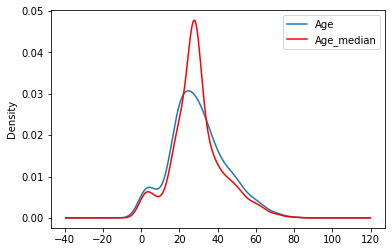

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Here we clearly see that there is differenced in distribution here it is minute so we used that

In [10]:
#$ pip install feature-engine
#### Second technique to fiil the missing values are
#from sklearn.impute import SimpleImputer

# create the imputer, the strategy can be mean and median.
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# fit the imputer to the train data
#imputer.fit(train)

# apply the transformation to the train and test
#train = imputer.transform(train)
#test = imputer.transform(test)

### Arbitrary Value Imputation

Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable with an arbitrary value. The arbitrary value should be different from the mean or median and not within the normal values of the variable.

We can use arbitrary values such as 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).

This method is suitable for numerical and categorical variables.

##### Assumptions of arbitrary value imputation

- Data is not missing at random.

#### Advantages of arbitrary value imputation

- Easy to implement.
- It’s a fast way to obtain complete datasets.
- It can be used in production, i.e during model deployment.
- It captures the importance of a value being “missing”, if there is one.

#### Limitations arbitrary value imputation

- Distortion of the original variable distribution and variance.
- Distortion of the covariance with the remaining dataset variables.
- If the arbitrary value is at the end of the distribution, it may mask or create outliers.
- We need to be careful not to choose an arbitrary value too similar to the mean or median (or any other typical value of the variable distribution).
- The higher the percentage of NA, the higher the distortions.

In [11]:
df = pd.read_csv('titanic_train.csv',usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
## it should not be more frequently present 
def input_nan4(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

In [15]:
input_nan4(df,'Age')

In [17]:
df.tail()

,Survived,Age,Fare,Age_zero,Age_hundred
886,0,27.0,13.00,27.0,27.0
887,1,19.0,30.00,19.0,19.0
888,0,NaN,23.45,0.0,100.0
889,1,26.0,30.00,26.0,26.0
890,0,32.0,7.75,32.0,32.0


In [18]:
# Another method
#from sklearn.impute import SimpleImputer

# create the imputer, with fill value 999 as the arbitraty value
#imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=999)

# fit the imputer to the train data
#imputer.fit(train)

# apply the transformation to the train and test
#train = imputer.transform(train)
#test = imputer.transform(test)

## End of Tail Imputation

End of tail imputation is roughly equivalent to arbitrary value imputation, but it automatically selects the arbitrary values at the end of the variable distributions.

This method is suitable for numerical variables.

Here are ways to select arbitrary values:

- If the variable follows a normal distribution, we can use the mean plus or minus 3 times the standard deviation.
- If the variable is skewed, we can use the IQR proximity rule.

The values to replace missing data should be calculated only on the train set.

#### Normal Distribution

Most of the observations (~99%) of a normally-distributed variable lie within the mean plus/minus three times standard deviations—for that the selected value = mean ± 3 ×standard deviations.

#### Skewed distributions

The general approach is to calculate the quantiles, and then the inter-quantile range (IQR), as follows:

- IQR = 75th Quantile –25th Quantile.
- Upper limit = 75th Quantile + IQR ×3.
- Lower limit = 25th Quantile - IQR ×3.

So the selected value for imputation is the previously calculated upper limit or the lower limit.

In [28]:
# If normal distribution
extreme=df.Age.mean()+3*df.Age.std()
def impute_nan3(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)
impute_nan3(df,'Age',df.Age.median(),extreme)


Text(0, 0.5, 'No of passenger')

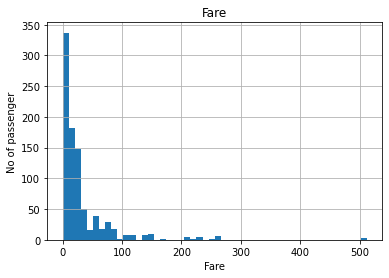

In [19]:
# IF SKewed distribution
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [20]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [21]:
extreme = 100
def impute_nan3(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [22]:
impute_nan3(df,'Fare',df.Fare.median(),extreme)

<AxesSubplot:>

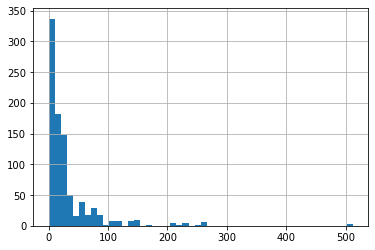

In [26]:
# when we replacing with median value we see very large building in middle
df['Fare'].hist(bins=50)

<AxesSubplot:>

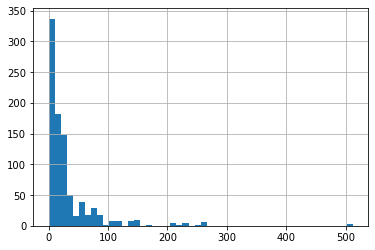

In [27]:
# here we get that large building at right last
df['Fare_end_distribution'].hist(bins=50)

In [29]:
## Another technique
#from feature_engine.missing_data_imputers import EndTailImputer

# create the imputer
#imputer = EndTailImputer(distribution='gaussian', tail='right')

# fit the imputer to the train set
#imputer.fit(train)

# transform the data
#train_t = imputer.transform(train)
#test_t = imputer.transform(test)

### Categorical VAriable

### Frequent Category imputation

Frequent category imputation—or mode imputation—consists of replacing all occurrences of missing values (NA) within a variable with the mode, or the most frequent value.

This method is suitable for numerical and categorical variables, but in practice, we use this technique with categorical variables.

You can use this method when data is missing completely at random, and no more than 5% of the variable contains missing data.

### Assumptions of frequent category imputation

- Data is missing at random.
- The missing observations most likely look like the majority of the observations (i.e. the mode

### Advantages of frequent category imputation

- Easy to implement.
- It’s a fast way to obtain a complete dataset.
- It can be used in production, i.e during model deployment.

### Limitations of frequent category imputation

- It distorts the relation of the most frequent label with other variables within the dataset.
- May lead to an over-representation of the most frequent label if there is are a lot of missing observations.

In [30]:
import pandas as pd
df = pd.read_csv('h_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
# Nw find the percentage of missing value
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [31]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

here we see that BsmtQual and GarageType has very less number of missing value compare to whole dataset

so here we use frequent category imputation to replace the nan value

what we do we see which is most frequent value in this then we replace with that with nan

we cants use with high number of missing value

<AxesSubplot:>

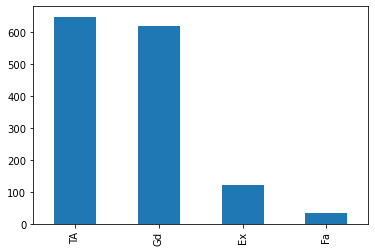

In [32]:
# compute the frequency with every feature
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

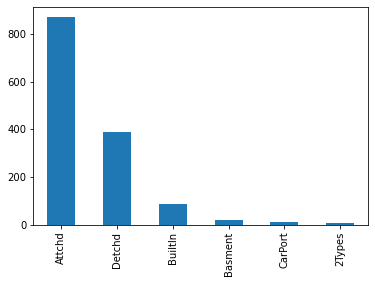

In [33]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

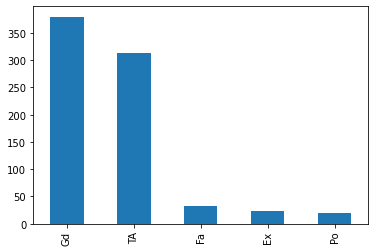

In [34]:
df['FireplaceQu'].value_counts().plot.bar()

In [35]:
#### REplacing Function
def impute_nanc(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [36]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nanc(df,features)

In [37]:
# another technique
#from sklearn.impute import SimpleImputer

# create the imputer, with most frequent as strategy to fill missing value.
#imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# fit the imputer to the train data
#imputer.fit(train)

# apply the transformation to the train and test
#train = imputer.transform(train)
#test = imputer.transform(test)

## Missing Category Imputation

This method consists of treating missing data as an additional label or category of the variable. Thus, we create a new label or category by filling the missing observations with a Missing category.

This method is the most widely used method of missing data imputation for categorical variables.

#### Advantages of missing category imputation

- Easy to implement.
- Fast way of obtaining complete datasets.
- It can be integrated into production.
- Captures the importance of “missingness”.
- No assumption made on the data.

#### Limitations of missing category imputation

If the number of missing values is small, creating an additional category is just adding another rare label to the variable.

In [38]:
df = pd.read_csv('h_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [40]:
df['BsmtQual1'] = np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual1
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [42]:
frequent = df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(frequent,inplace=True)
df.head(5)
# this can apply where we have more miising values it keep record thats y

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual1
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


Suppose if you have more frequent categories ,we just replace NAN with a new category , which means we specify the NAN the another category (this method is use more)

In [44]:
df = pd.read_csv('h_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
def impute_nancm(df,variable):
    df[variable]= np.where(df[variable].isnull(),"Missing",df[variable])

for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nancm(df,features)
    
df.head()    

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [45]:
# another technique
#from sklearn.impute import SimpleImputer

# create the imputer, with most frequent as strategy to fill missing value.
#imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="Missing")

# fit the imputer to the train data
# make sure to select only the categorical variable in the following train and test sets.
#imputer.fit(train)

# apply the transformation to the train and test
#train = imputer.transform(train)
#test = imputer.transform(test)

# For Both

### Complete case analysis (CCA) 

is a technique that consists of discarding observations where values in any of the variables are missing.

In CCA, we keep only those observations for which there’s information in all of the dataset variables. Observations with any missing data are excluded.

This method is suitable for both categorical and numerical variables

### CCA Assumptions

- Data is missing at random.

### CCA Advantages

- CCA is simple to implement.
- No data manipulation required.
- CCA Preserves the distribution of the variables.

### CCA Limitations

- It can exclude a significant fraction of the original dataset (if missing data is significant).
- Excludes observations that could be informative for the analysis (if data is not missing at random).
- CCA can create a biased dataset if the complete cases differ from the original data (e.g., when missing information is, in fact, MAR or NMAR).
- When using this method in production, the model can’t know how to handle missing data.

### When to use CCA

- Data is missing completely at random.
- No more than 5% of the total dataset contains missing data.


In [46]:
#read you data and apply that
#data.dropna(inplace=True)

## Missing Indicator

A missing indicator is an additional binary variable that indicates whether the data was missing for an observation (1) or not (0). The goal here is to capture observations where data is missing.

The missing indicator is used together with methods that assume data is missing at random:

- Mean, median, mode imputation.
- Random sample imputation.

This method is suitable for categorical and numerical variables.

#### Assumptions of missing indicator

- Data is NOT missing at random.
- Missing data are predictive.

#### Advantages of missing indicator

- Easy to implement.
- It can capture the importance of missing data.
- It can be integrated into production.

#### Disadvantages of missing indicator

- It expands the feature space.
- The original variable still needs to be imputed.
- Many missing indicators may end up being identical or very highly correlated.

In [47]:
#from sklearn.impute import MissingIndicator

# create the object with missing only columns.
#indicator = MissingIndicator(error_on_new=True, features='missing-only')
#indicator.fit(train)  

# print the columns of missing data.
#print(train.columns[indicator.features_])

# get the columns of missing indicators.
#temporary = indicator.transform(X_train)

# create a column name for each of the new Missing indicators
#indicator_columns = [column +'_NA_IND' for column in train.columns[indicator.features_]]
#indicator_df = pd.DataFrame(temporary, columns = indicator_columns)

# create the final train data.
#train = pd.concat([train.reset_index(), indicator_df], axis=1)

# now the same for the test set
#temporary = indicator.transform(test)
#indicator_df =  pd.DataFrame(temporary, columns = indicator_columns)

# create the final test data.
#test = pd.concat([ X_test.reset_index(), indicator_df], axis=1)

### Random Sample Imputation

Random sampling consists of taking a random observation from the pool of available observations of the variable and using those randomly selected values to fill in the missing ones.

This method is suitable for numerical and categorical variables.

#### Assumptions of random sample imputation

- Data is missing at random.
- We’re replacing the missing values with other values within the same distribution of the original variable.

#### Advantages of random sample imputation

- Easy to implement and a fast way of obtaining complete datasets.
- It can be used in production.
- Preserves the variance of the variable.

#### Disadvantages of random sample imputation

- Randomness.
- The relationship between imputed variables and other variables may be affected if there are a lot of missing values.
- Memory is massive for deployment, as we need to store the original training set to extract values from, and replace the missing values with the randomly selected values.

In [48]:
import pandas as pd
df=pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()
# it randomly choose the value for every index
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [49]:
def impute_nan2(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]= df[variable]
    
    #It will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [52]:
impute_nan2(df,"Age",28)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


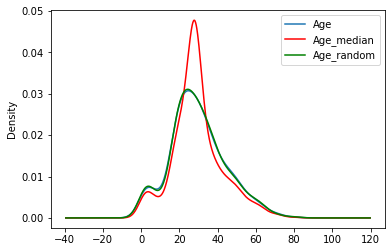

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Missing Values - Feature Enginnering 

Lifecycle of a DataScience Projects

 1. Data Collection Statergy---from company side,3rd party     APi's,Surveys,Surveys
 2. Feature Engineering - Handling Missing Values

Why are their Missing values?? 

survey -Depresion Survey -- information people will not  insert , They hesitate to put down the information

Can we depends on that Survey?
- Survey information are not that valid

like men hesitted to put his salary and female hesitate to put her age
and Some people may have died (when u do after somany year later )

Data Science Projects - Dataset should be collected from multiple sources (they try to collect from many place and combine that to analysis)

u have have variety of data not epends on one data 
Big data has that variety

Data that will be Missing--

- Continuous data 
    here we discuss hw to handle missing value in continuous data
- categorical data
     here we discuss hw to handle missing value in categorical data

#### What are the different types of Missing data?

1. #### Missing Completely at Random,MCAR: 

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observation.

This happens when the missing values have no hidden dependency on any other variable or any characteristic of observations. If a doctor forgets to record the age of every tenth patient entering an ICU, the presence of missing value would not depend on the characteristic of the patients.


#### When the data is MCAR,theere is absolutely no relationship between the data missing and any other values,observed or missing,within the dataset. In other word , those missing data points are  a rendom subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other
      

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### here we see that age,cabin in this feature there are missing values Can Nw we say that this are are Missing completely At RAndom ?

#### No bcs there is a relationship betwwen the this feature and the output , think also that this data is collected after person died

In [5]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Here Embarked is MCAR embarked means from which station it should peak we dont know that 

2. #### Missing DATA NOT AT RANDOM (MNAR) : Systematic missing VAlues :

This happens when the missing values depend on both characteristics of the data and also on missing values. In this case,  determining the mechanism of the generation of missing value is difficult. For example, missing values for a variable like blood pressure may partially depend on the values of blood pressure as patients who have low blood pressure are less likely to get their blood pressure checked at frequently.


#### There is Absolutely some relationship betwwen the data missing and any other values ,observed or missing within the dataset

In [6]:
import numpy as np
# convert that nan into 1 where data is 0
data['cabin_null'] = np.where(data['Cabin'].isnull(),1,0)

In [7]:
# find the percentage of null values
data['cabin_null'].mean()

0.7710437710437711

In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [9]:
# Nw we check the relationship with dependent feature in that we want to know taht
# what are the percentage of people who survived has not a missing values we check this

data.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### what this actually its means ?
#### Survived is 1 this say that from survived people 60 percent has missing values and not survived has 87 percent missing values

In [10]:
### Lets do with age
data['age_null'] = np.where(data['Age'].isnull(),1,0)

In [11]:
data.groupby(['Survived'])['age_null'].mean()

Survived
0    0.227687
1    0.152047
Name: age_null, dtype: float64

#### This actually means people who survived havs 15 percent age is missing and which people are nit survived has 22 pecent age missing

# Missing At RAndom(MAR)

Men --- hide their salary

Women --- hide their age

In this case, the probability of missing value depends on the characteristics of observable data. In survey data, high-income respondents are less likely to inform the researcher about the number of properties owned. The missing value for the variable number of properties owned will depend on the income variable.

### All the technique of handling , Missing values

1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitary imputation
6. Frequent categories imputation
7. Knn imputer

## Mean/Median/Mode imputation

when should we apply?

Mean/median imputation has the assumption that the data are missing completely at random(MCAR)

We solve this by replacing the NAN with the most frequent occurance of the variables

In [12]:
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [13]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
## To overcome the outliers we use median and mode

In [15]:
## lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [16]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [17]:
# why we not use mean bcz i think there is outliers
# calculate the median
median = df.Age.median()
median

28.0

In [18]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [19]:
# nw check after the imputation standardeviation change 
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


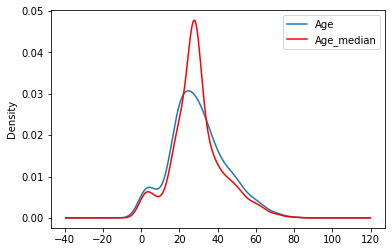

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [21]:
# here very minute difference so we use that 

### Advantages  and Disadvantages of Mean/Median imputation

##### Advantages

1. Easy to implement (Robust to outliers)
2. Faster way to obtain the complete dataset 



#### Disadvantages

1. Change or Distortion in the original variance
2. Impacts Correlation

In [22]:
# for categorical feature we use mode

## Random Sample Imputation

Aim: Random Sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used?

it assume that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd
df=pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
df['Age'].isnull().sum()

177

In [5]:
# it randomly choose the value for every index
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [6]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [7]:
def impute_nan2(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]= df[variable]
    
    #It will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [13]:
random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

In [14]:
random_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [8]:
median = df.Age.median()

In [9]:
median

28.0

In [10]:
impute_nan2(df,"Age",median)

In [11]:
df.head(50)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


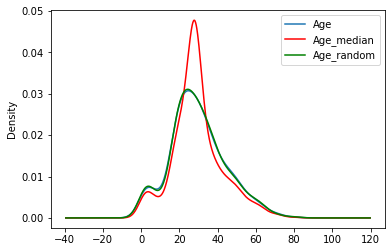

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages


1. Easy To implement
2. There is less distortion in variance

## Disadvantages


 1. Every situation randomness wont work(read wiki)

# Capturing NAN values with a new feature

#### it wors well if the data are not missing completely at random (Second Case)

In [35]:
df=pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [36]:
import numpy as np
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [37]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [38]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [39]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


by help of this when we creating new feature it helps us to track the records of missing value which is very useful when we creating a model

## Advantages 

1. Easy to implement
2. Captures the importance of missing values

## Disadvantages

1. Creating additional feature(Curse of Dimensionality) 

### End Of Distribution Imputation

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [40]:
df=pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

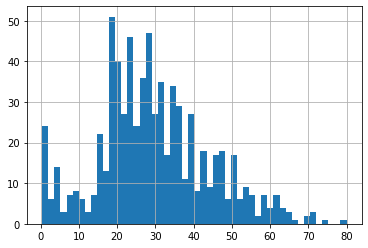

In [41]:
df.Age.hist(bins=50)

In [42]:
extreme=df.Age.mean()+3*df.Age.std()

In [43]:
extreme

73.27860964406095

D:\lal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

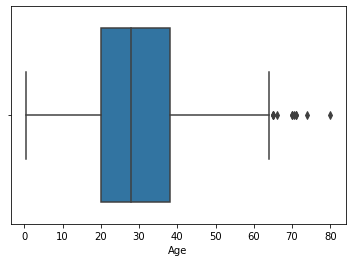

In [44]:
# why we not take the left extreme bcz we see from the graph outliers at right extreme only
# to see the outliers
import seaborn as sns
sns.boxplot('Age',data=df)

In [45]:
def impute_nan3(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [46]:
impute_nan3(df,'Age',df.Age.median(),extreme)

In [47]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

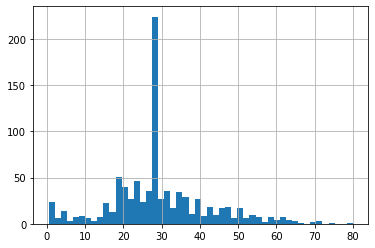

In [48]:
# when we replacing with median value we see very large building in middle
df['Age'].hist(bins=50)

<AxesSubplot:>

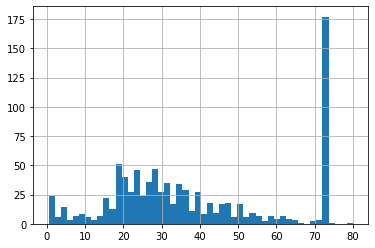

In [49]:
# here we get that large building at right last
df['Age_end_distribution'].hist(bins=50)

D:\lal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

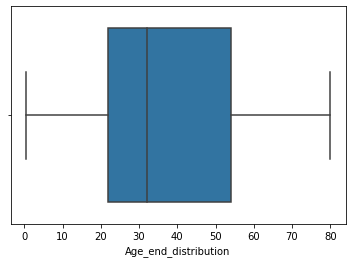

In [50]:
sns.boxplot('Age_end_distribution',data=df)

we see the outliers are capture by using END OF DISTRIBUTION IMPUTATION
It may work in some scenario

## Advantages

- EAsy to implements
- capturing the importance of missingess if there is one

## Disadvatntages

- distors the original distribution of the variable
- if missing is not importants , it may mask the predictive power of the original variable by distoring the disstribution
- if the nuber of NA is big , it will mask true outliers in the distributin
- if the number of NA is small, the replaced NA may be considered an outleirs and pre-processed in a subsequent feeature enginneering

you could have Numeric data and the following imputation techniques would apply:

- Impute using Mean/Median of the data
- Impute using Arbitrary Value
- Impute using the End of Tail method.

If you have Categorical data, then you could do the following:
- Impute data using Mode
- Adding a category for Missing Data

 If you have Mixed data, containing both Numeric and Categorical values, then you could do the following:
- Complete Case Analysis
- Adding an indicator for missing values
- Impute data using the Random Sample method


### Arbitary VAlue Imputation

it consists of replacing NAN by an arbitary value

In [51]:
df = pd.read_csv('titanic_train.csv',usecols=["Age","Fare","Survived"])

In [52]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [53]:
## it should not be more frequently present 
def input_nan4(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    

## Most frewuent use is mean/median/mode and random sample imputation

# Handle Categorical Missing Values

 - Delete that Rows
 - Replace with most frequent values
 - apply classifier algorithm to predict
 - apply unsupervised machine learning 

## Frequent Category Imputation

In [54]:
import pandas as pd
df = pd.read_csv('h_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [55]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [56]:
# Nw find the percentage of missing value
df.isnull().sum()


BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [57]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [58]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [59]:
df.shape

(1460, 4)

In [60]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

here we see that BsmtQual and GarageType has very less number of missing value compare to whole dataset

so here we use frequent category imputation to replace the nan value 

what we do we see which is most frequent value in this then we replace with that with nan

we cants use with high number of missing value

### Compute the frequency with every feature


<AxesSubplot:>

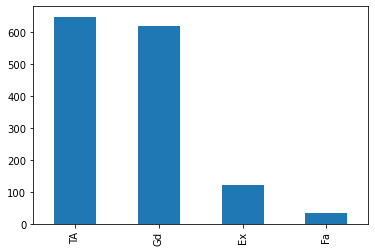

In [61]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

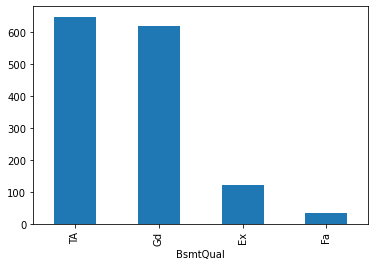

In [62]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

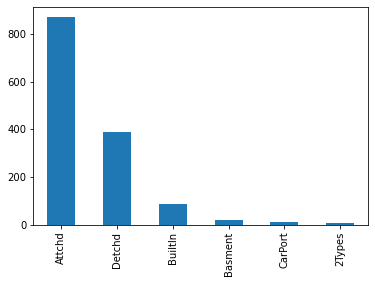

In [63]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

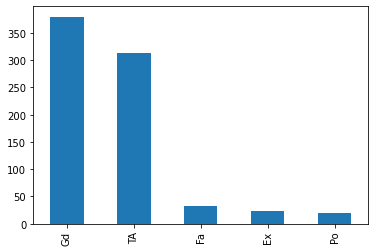

In [64]:
df['FireplaceQu'].value_counts().plot.bar()

In [65]:
#### REplacing Function
def impute_nanc(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [66]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nanc(df,features)

In [67]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [68]:
# we can alaso write this 
df['GarageType'].mode()

0    Attchd
dtype: object

 ### ADvantages 

1. easy way to implements
2. Faster way to implemets

## Disadvantages

1. it cants use with high number of missing values
2. It disorts the relation of the most frequent

# Adding a variable to capture NAN

In [69]:
df = pd.read_csv('h_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [70]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [71]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [72]:
df['BsmtQual1'] = np.where(df['BsmtQual'].isnull(),1,0)

In [73]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual1
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [74]:
frequent = df['BsmtQual'].mode()[0]

In [75]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [76]:
df.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual1
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


this can apply where we have more miising values it keep record thats y 

In [77]:
df['FireplaceQu1'] = np.where(df['FireplaceQu'].isnull(),1,0)

In [78]:
frequent = df['FireplaceQu'].mode()[0]

In [79]:
df['FireplaceQu'].fillna(frequent,inplace=True)

In [80]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual1,FireplaceQu1
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Suppose if you have more frequent categories ,we just replace NAN with a new category , which means we specify the NAN the another category (this method is use more)

In [81]:
df = pd.read_csv('h_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [82]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [83]:
def impute_nancm(df,variable):
    df[variable]= np.where(df[variable].isnull(),"Missing",df[variable])

In [84]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nancm(df,features)

In [85]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


### KNN imputer also there we use that to handle categorical missing feature

KNNImputer by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques.

Univariate methods used for missing value imputation are simplistic ways of estimating the value and may not provide an accurate picture always. For example, let us say we have variables related to the density of cars on road and levels of pollutants in the air and there are few observations that are missing for the level of pollutants, imputing the level of pollutants by mean/median level of pollutants may not necessarily be an appropriate strategy.

In such scenarios, algorithms like k-Nearest Neighbors (kNN) can help to impute the values of missing data. Sociologists and community researchers suggest that human beings live in a community because neighbors generate a feeling of security and safety, attachment to community, and relationships that bring out a community identity through participation in various activities.

A similar imputation methodology that works on data is k-Nearest Neighbours (kNN) that identifies the neighboring points through a measure of distance and the missing values can be estimated using completed values of neighboring observations.

In [86]:
import numpy as np
 
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)


array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [87]:
df = pd.read_csv('titanic_train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [88]:
df = df.drop([ 'PassengerId', 'Name', 
              'Ticket', 'Cabin'], axis=1)

In [89]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [90]:
from sklearn.impute import KNNImputer

One thing to note here is that the KNN Imputer does not recognize text data values. It will generate errors if we do not change these values to numerical values. For example, in our Titanic dataset, the categorical columns ‘Sex’ and ‘Embarked’ have text data.
A good way to modify the text data is to perform one-hot encoding or create “dummy variables”. The idea is to convert each category into a binary data column by assigning a 1 or 0. Other options would be to use LabelEncoder or OrdinalEncoder from Scikit-Learn’s preprocessing package.
In this tutorial, we will stick to one-hot encoding. First, we will make a list of categorical variables with text data and generate dummy variables by using ‘.get_dummies’ attribute of Pandas data frame package. An important caveat here is we are setting “drop_first” parameters as True in order to prevent the Dummy Variable Trap.

In [91]:
cat_variables = df[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [92]:
df = df.drop(['Sex', 'Embarked'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Another critical point here is that the KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values. For simplicity, we will use Scikit-Learn’s MinMaxScaler which will scale our variables to have values between 0 and 1.

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


Now that our dataset has dummy variables and normalized, we can move on to the KNN Imputation. Let’s import it from Scikit-Learn’s Impute package and apply it to our data. In this example, we are setting the parameter ‘n_neighbors’ as 5. So, the missing values will be replaced by the mean value of 5 nearest neighbors measured by Euclidean distance.

In [94]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [95]:
df.isna().any()

Survived      False
Pclass        False
Age           False
SibSp         False
Parch         False
Fare          False
Sex_male      False
Embarked_Q    False
Embarked_S    False
dtype: bool

## Categorical Encoding

Most machine learning algorithms and deep neural networks require numerical inputs. This means that if we have categorical data, we must first encode it to numbers in order to build models that actually work.

Simply put, the goal of categorical encoding is to produce variables we can use to train machine learning models and build predictive features from categories.

In this post, we present a number of techniques for this kind of data transformation; here is a list of the different techniques:

### Traditional techniques

- One-hot encoding
- Count or frequency encoding
- Ordinal or label encoding

### Monotonic relationship

- Ordered label encoding
- Mean encoding
- Probability ratio encoding
- Weight of evidence

### Alternative techniques

- Rare labels encoding
- Binary encoding

pip install category_encoders


# Hw to handle Categorical Features

There are two types of Encoding 
- Nominal Encoding
- Ordinal Encoding

nominal encoding are that where we not worry about the place of that categories of feature like example Gender case, country case

ordinal encoding are that where we worry about the place of categorical like rank, salary, education we create a rank system to analysis here we rearrange the categories on Rank

# Nominal Encoding
   - One hot Encoding
   - One hot Encoding with many feature
   - mean Encoding
   
   - 

### One hot Encoding

In [96]:
import pandas as pd

In [97]:
df = pd.read_csv('titanic_train.csv',usecols=['Sex'])

In [98]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [99]:
# it take alphabetically order
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [100]:
df=pd.read_csv('titanic_train.csv',usecols=['Embarked'])

In [101]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [102]:
df.dropna(inplace=True)

In [103]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


what are the disadvantages of onehot encoder are suppose u have many categories then it create many feature which leads us to dimensinality curse

### One hotencoding with many categories in a featur

In [104]:
df = pd.read_csv('mercedesbenz.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [105]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [106]:
# here we see hw many categories in that X1 feature we cant apply onehot encoder in this 
df['X1'].unique()

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

In [107]:
df['X1'].value_counts().head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [108]:
# here  we see that each feature has many categories like 47,27
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


so we take top 10 categories and do hot encoding for that 
we see that top 10 which come regularly wwe atke this 

In [109]:
# it depends on that hw many most frequent label present it may be 10 20
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [110]:
lst_10 = df.X1.value_counts().sort_values(ascending=False).head(10).index
ist_10 = list(lst_10)

In [111]:
lst_10

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [112]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [113]:
df[lst_10].head()

,aa,s,b,l,v,r,i,a,c,o
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


here we change all top 10 category in X1 into dummies like this we handle for mutiple categories

In [114]:
# get the whole dataset of dummy variacle , for all the categorical variable
def one_hot_top(df,variable,top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label]=np.where(data[variable]==label,1,0)
        
# read the data again
data = pd.read_csv('mercedesbenz.csv',usecols=['X1','X2','X3','X4','X5','X6'])

# encode X2 into the 10 most frequent categories
one_hot_top(data,'X2',lst_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_aa,X2_s,X2_b,X2_l,X2_v,X2_r,X2_i,X2_a,X2_c,X2_o
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0


 # Ordinal Number Encoding
    
    - LAbel Encoding
    - Target Guided Ordinal Encoding

ordinal number are work with rank System like
Grading System --A,B,C,D,F
A-1
B-2
C-3
D-4
F-5
Anothe example of a experience Batman and days week

In [115]:
import datetime

In [116]:
today_date = datetime.datetime.today()

In [117]:
today_date

datetime.datetime(2021, 3, 28, 18, 29, 38, 373253)

In [118]:
# it give a difference of date
today_date-datetime.timedelta(1)

datetime.datetime(2021, 3, 27, 18, 29, 38, 373253)

In [119]:

# Nw we create a list of 15 days
days = [today_date-datetime.timedelta(x) for x in range(0,15)]

In [120]:
data = pd.DataFrame(days)
data.columns=['Day']

In [121]:
data.head()

,Day
0,2021-03-28 18:29:38.373253
1,2021-03-27 18:29:38.373253
2,2021-03-26 18:29:38.373253
3,2021-03-25 18:29:38.373253
4,2021-03-24 18:29:38.373253


In [122]:
data['weekday']=data['Day'].dt.day_name()
data.head()

,Day,weekday
0,2021-03-28 18:29:38.373253,Sunday
1,2021-03-27 18:29:38.373253,Saturday
2,2021-03-26 18:29:38.373253,Friday
3,2021-03-25 18:29:38.373253,Thursday
4,2021-03-24 18:29:38.373253,Wednesday


In [124]:
#in this date also encoded
# data.apply(preprocessing.LabelEncoder().fit_transform)

In [125]:
 le = LabelEncoder()
# le.fit_transform(data['weekday'])
# data.apply(preprocessing.LabelEncoder().fit_transform(data['weekday']))
data['weekday'] = le.fit_transform(data.weekday.values)

NameError: name 'LabelEncoder' is not defined

In [126]:
data.head()

,Day,weekday
0,2021-03-28 18:29:38.373253,Sunday
1,2021-03-27 18:29:38.373253,Saturday
2,2021-03-26 18:29:38.373253,Friday
3,2021-03-25 18:29:38.373253,Thursday
4,2021-03-24 18:29:38.373253,Wednesday


In [127]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [128]:
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [129]:
data['weekday_ordinal']=data['weekday'].map(dictionary)

In [130]:
data.head()

,Day,weekday,weekday_ordinal
0,2021-03-28 18:29:38.373253,Sunday,7
1,2021-03-27 18:29:38.373253,Saturday,6
2,2021-03-26 18:29:38.373253,Friday,5
3,2021-03-25 18:29:38.373253,Thursday,4
4,2021-03-24 18:29:38.373253,Wednesday,3


when u have like this data where u have to give rank then u do like this 

In [131]:
import pandas
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

df = pandas.DataFrame({
    'pets': ['cat', 'dog', 'cat', 'monkey', 'dog', 'dog'], 
    'owner': ['Champ', 'Ron', 'Brick', 'Champ', 'Veronica', 'Ron'], 
    'location': ['San_Diego', 'New_York', 'New_York', 'San_Diego', 'San_Diego', 
                 'New_York']
})

# df.apply(preprocessing.LabelEncoder().fit_transform)

le = LabelEncoder()
le.fit_transform(df['location'])


array([1, 0, 0, 1, 1, 0])

## Count Or Frequency Encoding

In [ ]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

In [ ]:
# take the categorical feature
# here can also do by for loop using dtype!=0
columns=[1,3,5,6,7,8,9,13]

In [ ]:
train_sets = train_set[columns]

In [ ]:
train_sets.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [ ]:
train_sets.head()

In [ ]:
for feature in train_sets.columns[:]:
    print(feature,":",len(train_sets[feature].unique()),'labels')

here we see the country feature has more number of category so hw we use Count Or Frequency Encoding

In [ ]:
country_map = train_sets['Country'].value_counts().to_dict()

In [ ]:
# here we replace that country with the their count number 
train_sets['Country']=train_sets['Country'].map(country_map)
train_sets.head(2)

###  Advantages

1. Easy To Use
2. Not increasing feature space
3. Use where we have high number of categories

#### Disadvantages

1.it will provide same weight if the frequency are same
it will not handle if the frequency are same

## Target Guided Ordinal Encoding

1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [ ]:
import pandas as pd
df = pd.read_csv('titanic_train.csv',usecols=['Cabin','Survived'])

In [ ]:
df.head()

In [ ]:
df['Cabin'].fillna('Missing',inplace=True)

In [ ]:
df.head()

In [ ]:
# we are going to choose the frst letter
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [ ]:
df.head()

In [ ]:
df.Cabin.unique()

In [ ]:
# here we get probability of that cabin person survived
df.groupby(['Cabin'])['Survived'].mean()

In [ ]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [ ]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

In [ ]:
# it give index
enumerate(ordinal_labels,0)

In [ ]:
ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,0)}

In [ ]:
ordinal_labels2

In [ ]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

here we change the categotical value by giving label or rank

## Mean Encoding

- where we use mean encoding suppose we have pincode like example if we go make dummies variable then it so difficult thats y what we do we calculate the mean with respect to dependent variable and change that variable into numerical feature 

In [ ]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [ ]:
mean_ordinal

In [ ]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()

it have monotonic relationship with dependent feature

it lead to overfitting

## Probability Ratio Encoding

1. Probability of Survuved based on Cabin -- Categorical Feature
2. probability of Not Survived --1-pr(Survived)
3. pr(survived)/pr(Not Survived)
4. Dictionanary to map cabin with probability
5. replace with the categorical featuere

In [ ]:
df=pd.read_csv('titanic_train.csv',usecols=['Cabin','Survived'])
df.head()

In [ ]:

### Replacing
df['Cabin'].fillna('Missing',inplace=True)
df.head()

In [ ]:
df['Cabin'].unique()

In [ ]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

In [ ]:
df.Cabin.unique()

In [ ]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [ ]:
prob_df=pd.DataFrame(prob_df)
prob_df

In [ ]:
prob_df['Died']=1-prob_df['Survived']

In [ ]:
prob_df.head()

In [ ]:
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

In [ ]:
probability_encoded=prob_df['Probability_ratio'].to_dict()

In [ ]:
df['Cabin_encoded']=df['Cabin'].map(probability_encoded)
df.head()

  # TRansformation of Features

Why Transformation of Feature Are Required?

 1. Linear Regression -- Gradient Descent -- Global Minima
 
 2. Algorithms like KNN,K Means,Hierarichal Clustering -- Eucledian Distance
 
Every Point has some vectors and direction .when ever this vector have huge difference the finding out the distance , global mimima take huge time thats y we  Transformation and try to scale down this feature

DO YOU REQUIRED TRANSFORMATION TO EVERY MACHINE LEARNING TECHNIQUE ?

No we dont required transformation for every machine learning we required that when we use tht machine learning technique wher concept of gradient descent like linear and logistic regression and eucledian distance concept use .

In deep learning in all technique we required transformation

Deep Learning technique(Standardization , Scaling) 

1. ANN---> Global Minima,Gradient
2.CNN and 3.RNN   0-255 pixels

## Types of Transformation


### Feature scaling

1. NOrmalization and Standardization
2. Scaling to Minimum and Maximum values
3. Scaling to Median and Quantilies

### Why Feature Scaling MAtters



- The scale of the variable directly influences the regression coefficient.
- Variables with a more significant magnitude dominate over the ones with a smaller magnitude range.
- Gradient descent converges faster when features are on similar scales.
- Feature scaling helps decrease the time to find support vectors for SVMs.
- Euclidean distances are sensitive to feature magnitude

To overcome this effect, all features have to be at the same level of scale or magnitude, especially if the used models are sensitive to the magnitude. Below, we’ll cover a few common algorithm architectures, comparing their sensitivity to feature magnitude.

#### Algorithms sensitive to feature magnitude

- Linear and logistic regression
- Neural networks
- Support vector machines
- KNN
- K-means clustering
- Linear discriminant analysis (LDA)
- Principal component analysis (PCA)

#### Algorithms intensive to feature magnitude

- Classification and regression trees
- Random forests
- Gradient boosted trees




# Transformation

4. Guassian Transformation 
     - Logarithmic Transformation  
     - Reciprocal Trnasformation 
     - Square Root Transformation
     - Exponential Trnasformation 
     - Box Cox Transformation
     
Keep in mind also that these transformations have some limitations; for example, the definition of logarithmic transformation is only for positive numbers; reciprocal transformation is naturally not defined for zero.     

### Standardization

Mean normalization and standardization suggests centering the variable at 0 and re-scaling the variable’s value range to the range of -1 to 1.

The method includes subtracting the mean from each variable observation and then dividing by the difference between the minimum and the maximum value of that variable: for normalization

The procedure includes subtracting the mean from each variable observation and then dividing by the standard deviation:  for standardization

This technique will not normalize the variable distribution.

Here’s what you need to remember about mean normalization:

- It centers the mean at 0.
- The resulting variance will be different.
- It may modify the shape of the original distribution.
- It “normalizes” the minimum and maximum values within the range[-1, 1].
- It preserves outliers if they exist.

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

In [ ]:
import pandas as pd
df=pd.read_csv('titanic_train.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
### standarisation: We use the standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
### fit vs fit_transform
### when u apply machine learning algorithm use fit 
### and when u applly any transformation technique use fit_transform
df_scaled = scaler.fit_transform(df)

In [ ]:
df_scaled

In [ ]:
pd.DataFrame(df_scaled)

here u see that transformation are happening in feature wise not a row wise 

In [ ]:
# lets nw we want Pclass
plt.hist(df_scaled[:,1],bins=20)

In [ ]:
plt.hist(df_scaled[:,2],bins=20)

In [ ]:

plt.hist(df_scaled[:,3],bins=20)

pclass graph get thats way bcz we have 3 class in that

AGE graph get we replace missing value with median thats y

FAre class get like this graph bcz there is lot of outliers , if outliers present in ur data then definetily it get impacted

### MIn MAx Scaling(### CNN)---DEEP LEARNING TECHNIQUE

Minimum and maximum scaling both compress the values between 0 and 1. It subtracts the minimum value from all the variable observations, and then divides it by the variable’s value range:

This technique will not normalize the variable distribution.

Here’s what you need to remember about Min-Max Scaling:

- It does not center the mean at 0.
- It makes the variance vary across variables.
- It may not maintain the shape of the original distribution.
- The minimum and maximum values are in the range of [0,1].
- This method is very sensitive to outliers.

widely use in deep learning and cnn

in machine learning we use mostly standarization for normal distribution if there is outliers it may empacted

Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [ ]:
min_max.fit_transform(df)

In [ ]:
df_minmax = pd.DataFrame(min_max.fit_transform(df),columns=df.columns)

In [ ]:
df_minmax.head()

In [ ]:
plt.hist(df_minmax['Pclass'],bins=20)

In [ ]:
plt.hist(df_minmax['Age'],bins=20)

In [ ]:
plt.hist(df_minmax['Fare'],bins=20)

### Robust Scaler

It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 

1-10 precentile---10% of all values in this group is less than 1 

4-40%

Here’s what you need to remember about robust scaling:

- It centers the median at 0 .
- The resulted variance varies across variables.
- It may not preserve the shape of the original distribution.
- The minimum and maximum values vary.
- It is robust to outliers.

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

In [ ]:
plt.hist(df_robust_scaler['Age'],bins=20)

In [ ]:
plt.hist(df_robust_scaler['Fare'],bins=20)

it is most robust for outliers

## Maximum Absolute Scaling

Maximum absolute scaling scales the variable values between -1 and 1 by dividing the data by its maximum value: X = X/max(x)

Here is what you need to remember about Maximum Absolute Scaling:

- The resulting mean is not centered.
- It doesn't scale the variance.
- It’s sensitive to outliers.

In [58]:
# import the needed packages
#import pandas as pd
#from sklearn.preprocessing import MaxAbsScaler

# read your data
#data = pd.read_csv("yourData.csv")

# create the scaler object
#max_abs = MaxAbsScaler()

# fit the scaler to the train data
#max_abs.fit(train)

# transform train and test data
#train_scaled = max_abs.transform(train)
#test_scaled = max_abs.transform(test)

### Scaling to vector unit norm

In scale to the vector unit norm, we divide each feature’s vector by the distance of the vector, as shown below: x= X/||X||

For the distance measure, you can use either:
- The Euclidean distance ( — or L2 norm) with the formula:

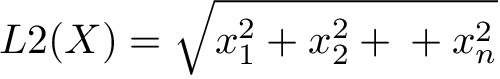

- The Manhattan distance ( — or L1 norm) with the formula:


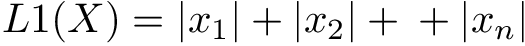

Euclidean distance squares the values of the feature vector components; therefore, outliers will have a heavier weight. For that, if you have outliers, try to use L1 normalization instead.

Here’s what you need to remember about scaling to the vector unit norm:

- The length of the resulting vector is 1.
- It normalizes the feature vector and not the observation vector.
- It’s sensitive to outliers.
- Recommended for text classification and clustering.

In [59]:

# import the needed packages
#import pandas as pd
#from sklearn.preprocessing import Normalizer

# read your data
#data = pd.read_csv("yourData.csv")

# create the scaler object with your prefered norm.
#max_abs = Normalizer(norm = 'l2')

# fit the scaler to the train data
#max_abs.fit(train)

# transform train and test data
#train_scaled = max_abs.transform(train)
#test_scaled = max_abs.transform(test)

### Conclusion

You have to remember that the choice of the algorithm for your project impacts whether you need scale your variables or not. Once you make this determination, you then have a range of methods and techniques in your toolkits and to scale the data. Hopefully this guide is a helpful in selecting the correct methods.

### Guassian Transformation

guassian means normally distribution 

Some machine learning algorithms like linear and logistic assume that the features are normally distributed

- Accuracy 
- Performance

suppose when ur data are not normally distribution then wwe apply some mathatical equation and convert that into normal distribution . There are many technique 

- logarithmetic transformation
- reciprocal transformation
- square root transformation
- exponential transformation(more general u ca use any exponent)
- boxcox transformation

after apply this transformation we have to apply standarization for some of the machine learning


When we have sckeewed data we aply logarithmetic transformation to convert normal distribution

In [ ]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

In [ ]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

In [ ]:
df.isnull().sum()

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
### if you want to check whether feature is gaussian or normal distributed
### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [ ]:
plot_data(df,'Age')

if the all point fallen to that line then we say it follow gaussian transformation or normal transformation


#### Logarithmic Transformation

This is the simplest and most popular among the different types of transformations and involves a substantial transformation that significantly affects distribution shape.

We can use it (natural logarithmic ln or log base 10) to make extremely skewed distributions less skewed, especially for right-skewed distributions.

You should note that this function is defined only for strictly positive numbers.

In [ ]:
## Logarithmic work well for right and left skeww
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

here we see that it is not normally distributaion after logarithmatic 

### Reciprocal Transformation

The reciprocal transformation is a powerful transformation with a radical effect. The reciprocal reverses the order among values of the same sign, so large values become smaller. The negative reciprocal preserves the order among values of the same sign.
You should note that this function is not defined for zero.

In [ ]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

##### Square Root Transformation

Another simple transformation, this one has an average effect on distribution shape: it’s weaker than logarithmic transformation, and it’s also used for reducing right-skewed distributions.

One particular advantage of square root transformation is that you can apply it to zero values.

You should note that this function is defined only for positive numbers.


In [ ]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

### Exponential Transformation

Power transformation has a reasonable effect on distribution shape; generally, we apply power transformation (power of two usually) to reduce left skewness.
You can use any exponent in this transformation; you can even use the exp() function. Try and see which one gives you better results.

In [ ]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

this is beest fit to middle line means means normally distribution

### BoxCOX Transformation

Box-Cox is one of the most successful transformations; it’s an evolution of the exponential transformation, which looks through various exponents instead of trying them manually.

By doing Box-Cox transformation, we’re searching and evaluating all the other transformations and choosing the best one.

The exponent here is a variable called lambda (λ) that varies over the range of -5 to 5, and in the process of searching, we examine all values of λ. Finally, we choose the optimal value (resulting in the best approximation to a normal distribution) for your variable.
You should note that this function is defined only for positive numbers.

The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [ ]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [ ]:
print(parameters)

In [ ]:
plot_data(df,'Age_Boxcox')

it convert much better than exponential

for linear regression we need that our data is in normaldistribution there we use that

In [ ]:
### FAre has zero value that whys it give error
plot_data(df,'Fare')

In [ ]:
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

here we how logirthmetic do very well for right sckew see that select like this 

In [ ]:

df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')

### YEO-Johnson Transformation

This transformation is somewhat of an adjustment to the Box-Cox transformation, by which we can apply it to negative numbers.


In [54]:
# import the needed packages.
#import pandas as pd
#import numpy as np
#from sklearn.preprocessing import PowerTransformer

# load your data
#data = pd.read_csv("somedata.csv")

# create columns variables to hold the columns that need transformation
#columns = ['col_1','col_2','col_n']

# create the power transformer object with method 'yeo-johnson'
#yeo_johnson_transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# apply the transformation to your data
#data_new = yeo_johnson_transformer.transform(data[cols])

# HAndling Imbalanced dataset -- MAchine Learning

In [ ]:
import  pandas  as pd
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data['Class'].value_counts()

here we see there is huge difference so this is a imbalanced dataset

In [ ]:
# first we independent and dependent value
X = data.drop('Class',axis=1)
y = data.Class

In [ ]:
# People are saying ensemble technique are not care abut the imbalance
# lets check
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
# cross validation also help the imbalanced dataset to do something
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:
log_class=LogisticRegression()
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv = KFold(n_splits=5,shuffle=False,random_state=None)

In [ ]:
clf = GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [ ]:
# clf.fit(X_train,y_train)

In [ ]:
# y_pred=clf.predict(X_test)

In [ ]:
# print(confusion_matrix(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

here we see accuracy is 99 percent that simply means our data is inbalanced

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier()
#classifier.fit(X_train,y_train)

In [ ]:
#y_pred=clf.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
#print(accuracy_score(y_test,y_pred))
#print(classification_report(y_test,y_pred))

So see here power of decision tree it not that much impacted bcz of imbalanced dataset if we use hyperprameter on that then it give us more good resuls 
thats is the power of ensemble method

  before doing undersampling all this do that upward things to handle imbalanced dataset like cv and gridsearch in cv k fold

#### Under Sampling

by using the undersampling we reduce the number of maximum labels

there is lots of disadvantages related to this like data is missing we use this where we have less data


In [ ]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns = NearMiss(0.75)
X_train_ns,y_train_ns = ns.fit_resample(X_train,y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_ns)))

In [ ]:
0.8*433 # this is the .8 of that value


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier()
# classifier.fit(X_train_ns,y_train_ns)

In [ ]:
# y_pred=clf.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

AT THE LAST RANDOMFOREST ARE BEST FOR LIKE THIS DATA

BUT WE HAVE TO LKNOW ABOUT THAT

## Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.5)
X_train_ns,y_train_ns = os.fit_resample(X_train,y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_ns)))

 Hw to handle imbalanced dataset?
 
  if our dataset is small i definanetly go with undersampling but i will focusing on the all performamance metrics like recall precision f1 socre apart from that i also focusing on based on the domain knowledge whether i have to reducing tpr or fpr based on that i select my roc curve that is probability value wheyher is 0.6  depends finally i also do smote technique ,oversampling and i always revolve around the understanding the performanance metrics finally if this not work then i definattly go with ensemble technique 
  like random forest ,xgboost and also provide my class _weight partameter hyperparameter then it do well

By doing oversampling after that  random foest apply we get  fpr reduce 
oversampling do well

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
# here based on the point nearest point are created 
# which is low in data make that data take point and print the nearest point
#smk = SMOTETomek(0.5)
#X_resss,y_res=smk.fit_resample(X_train,y_train)
#print('Original dataset shape {}'.format(Counter(y_train)))
#print('Resampled dataset shape {}'.format(Counter(y_res)))

There are the technique Esemble technique,isolation forest   

## OUTLIERS

### Detecting Outliers

We can detect and find outliers using various techniques. Some of them include:
Using visualization plots like boxplot and scatterplot:

- Using a normal distribution (mean and std):
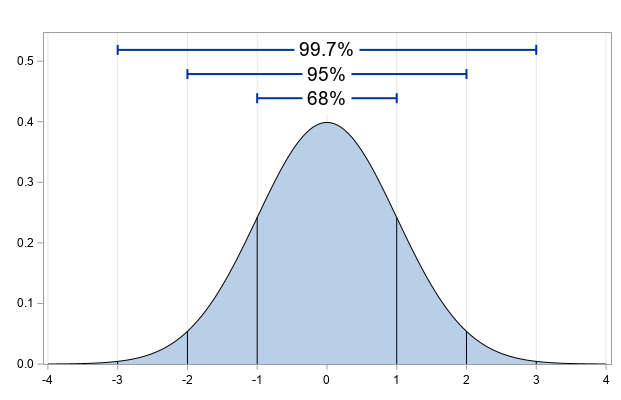

In a normal distribution, about 99.7% of the data lie within three standard deviations of the mean. Consequently, if any observation is more than three times the standard deviation, it’s possible that it’s an outlier.

### Inter-quantal range proximity rule:

The concept of the interquartile range (IQR) is used to build boxplot graphs. The idea is simple—we divide our data into four parts, and each part is a quartile.

IQR is the difference between the third quartile Q3 ( 75 percent) and the first quartile or Q1 (25 percent).

With IQR, outliers are defined as the observations that are:
Below Q1 − 1.5 × IQR.
Above Q3 + 1.5 × IQR.
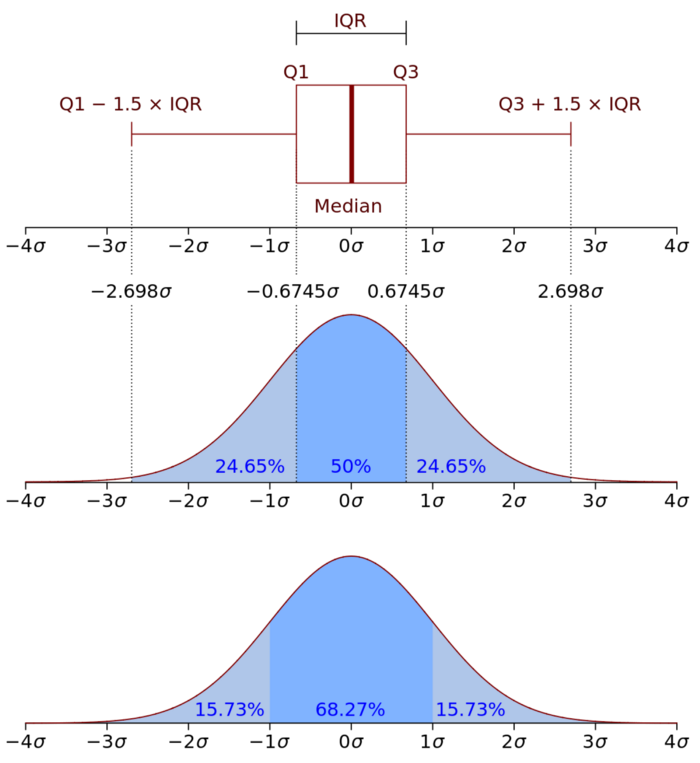


### Handling Outliers

Now that we understand how to detect outliers in a better way, it’s time to engineer them. We’re going to explore a few different techniques and methods to achieve that:

- Trimming: Simply removing the outliers from our dataset.
- Imputing: We treat outliers as missing data, and we apply missing data imputation techniques.
- Discretization: We place outliers in edge bins with higher or lower values of the distribution.
- Censoring: Capping the variable distribution at the maximum and minimum values.


#### Trimming

Trimming (or truncation) merely means removing outliers from the dataset; what we need here is just to decide on a metric to determine outliers.
Here are some points to consider when working with the trimming method:
- This method is fast.
- It can remove a significant amount of data ( — so be careful).

In [55]:
# import the needed packages
#import pandas as pd
#import numpy as np

# read your data
#data = pd.read_csv("yourData.csv")

#for variable in data.columns:
    #calculate the IQR
    #IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)
    
    #calculate the boundries
   # lower = data[variable].quantile(0.25) - (IQR * 1.5)
    #upper = data[variable].quantile(0.75) + (IQR * 1.5)
    
    # find the outliers
    #outliers = np.where(data[variable] > upper, True, np.where(data[variable] < lower, True, False))
    
    # remove outliers from data.
    #data = data.loc[~(outliers, ] 

## Censoring

Censoring (or capping) means setting the maximum and/or the minimum of the distribution at an arbitrary value.

In other words, values bigger or smaller than the arbitrarily chosen value are replaced by this value.

When doing capping, remember that:
- It does not remove data.
- It distorts the distributions of the variables.

#### Arbitrarily

In [56]:
# import the needed packages
#import pandas as pd
#import numpy as np

# read your data
#data = pd.read_csv("yourData.csv")

#for variable in data.columns:

    # create boundries (age for example)
    #lower = 10
    #upper = 89
    
    # replacing the outliers
    #data[variable] = np.where(data[variable] > upper, upper, np.where(data[variable] < lower, lower, data[variable]))

# Inter-quantal range proximity rule 
#for variable in data.columns:
    #calculate the IQR
    #IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)
    
    #calculate the boundries
    #lower = data[variable].quantile(0.25) - (IQR * 1.5)
    #upper = data[variable].quantile(0.75) + (IQR * 1.5)
    
    # replacing the outliers
    #data[variable] = np.where(data[variable] > upper, upper, np.where(data[variable] < lower, lower, data[variable]))
    
## Gaussian approximation
#for variable in data.columns:
    
    #calculate the boundries
    #lower = data[variable].mean() - 3 * data[variable].std()
    #upper = data[variable].mean() + 3 * data[variable].std()
    
    # replacing the outliers
    #data[variable] = np.where(data[variable] > upper, upper, np.where(data[variable] < lower, lower, data[variable]))
    
# using quantiles
#for variable in data.columns:
    
    #calculate the boundries
    #lower = data[variable].quantile(0.10)
    #upper = data[variable].quantile(0.90)
    
    # replacing the outliers
    #data[variable] = np.where(data[variable] > upper, upper, np.where(data[variable] < lower, lower, data[variable]))



### Imputing

Another technique used to handle outliers is to treat them as missing data. We have a range of methods that we can use to replace or impute outliers. If you’d like to explore these techniques in more depth, you can do so here.

### Transformation

We can also apply some mathematical transformations, such as log transformation. To handle the outliers, there are a range of transformation techniques, which you can learn more about here.

## Discussion Related With Outliers And Impact On Machine Learining!!

#### which Machine Learning Models Are Sensitive To Outliers ?

Some times outliers are important and some time outliers are not important So when the outliers are important like when u do somithing like security like credit card fraud
private networkung hackers prevent that time outliers are important .In medical case also outliers are important like cancer detection wher e eeveery person not have cancer there are also outliers are important.

Should we remove the outliers?

Depend on the data on which working we remove outliers or not , depending on the problem statement like we discuss before

Should we keep the outliers for Titanic dataset ?
 yes in this case we have to remove the outliers 
 
like in credit card fraud we dont remove the outliers we use that machine learning algorithm  which are not sensitive to outliers 


Suppose u doing work with sales forecasting u see sudden spark in data can we remove the outliers in that case?

NO i cant remove the outliers in that casebcz that outliers are very important to us there is sudden karan jo wo spike hua they give important information



1) Naivye Bayes Classifier--- Not Sensitive To Outliers

2) SVM-------- Not Sensitive To Outliers

3) Linear Regression---------- Sensitive To Outliers

4) Logistic Regression------- Sensitive To Outliers

5) Decision Tree Regressor or Classifier---- Not Sensitive

6) Ensemble(RF,XGboost,GB)------- Not Sensitive

7) KNN--------------------------- Not Sensitive

8) Kmeans------------------------ Sensitive

9) Hierarichal------------------- Sensitive

10) PCA-------------------------- Sensitive

11) Neural Networks-------------- Sensitive



In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('titanic_train.csv')
df.head()

In [ ]:
df['Age'].isnull().sum()

In [ ]:
import seaborn as sns

In [ ]:
sns.distplot(df['Age'].dropna())

In [ ]:
sns.distplot(df['Age'].fillna(100))

# Gaussian Distributed

In [ ]:
# to see the outliers
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

In [ ]:
figure=df.boxplot(column="Age")

In [ ]:
df['Age'].describe()

## If the Data is Normally Distributed We USe this

##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers


In [ ]:
uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

### If Features Are Skewed We Use the below Technique

In [ ]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [ ]:
df.boxplot(column="Fare")

In [ ]:

df['Fare'].describe()

In [ ]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [ ]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

In [ ]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

In [ ]:
 data = df.copy()

In [ ]:
data.loc[data['Age']>=73,'Age']=73

In [ ]:
data.loc[data['Fare']>=100,'Fare']=100

In [ ]:

figure=data.Age.hist(bins=50)
figure.set_title('age')
figure.set_xlabel('age')
figure.set_ylabel('No of passenger')

In [ ]:

figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [ ]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

When u have more data then remove the outliers and replcae them if u not have

### discretization

which is the process of transforming a continuous variable into a discrete one. It essentially creates a set of contiguous intervals that span the variable’s value range.

Binning is another name for discretization, where the bin is an alternative name for the interval.

#### Discretization Approaches

There are multiple approaches to achieve this discretization. In this guide, we’ll explore the following methods:

##### Supervised Approach

- Discretization with decision trees

##### Unsupervised Approaches

- Equal-width discretization
- Equal-frequency discretization
- K-means discretization

##### Other

- Custom discretization

### Equal-width Discretization

This is the most simple form of discretization—it divides the range of possible values into N bins of the same width.

width = maxvalue-minvalue/N

N= number of bins or interval,this parameter is something to determine experimentally—there’s no rule of thumb here

When working with equal-width discretization, there are some points to consider:

- Equal-width discretization does not improve the values spread.
- This method handles outliers.
- It creates a discrete variable (obviously).
- It’s useful when combined with with categorical encodings.

In [60]:
# import the libraries
#import pandas as pd
#from sklearn.preprocessing import KBinsDiscretizer

# load your data
#data = pd.read_csv('yourData.csv')

# create the discretizer object with strategy uniform and 8 bins
#discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform') 

# fit the discretizer to the train set
#discretizer.fit(train)

# apply the discretisation
#train = discretizer.transform(train)
#test = discretizer.transform(test)

#### Equal-Frequency Discretization

Equal-frequency discretization divides the scope of possible values of the variable into N bins, where each bin holds the same number (or approximately the same number) of observations.

When working with equal-frequency discretization, here are some points to consider:

- In this method, the interval boundaries correspond to the quantiles.
- This method improves the value spread.
- Equal-frequency handles outliers.
- This arbitrary binning may disturb the relationship with the target.
- It’s useful when combined with with categorical encodings.

In [61]:
# import the libraries
#import pandas as pd
#from sklearn.preprocessing import KBinsDiscretizer

# load your data
#data = pd.read_csv('yourData.csv')

# create the discretizer object with strategy quantile and 8 bins
#discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile') 

# fit the discretizer to the train set
#discretizer.fit(train)

# apply the discretisation
#train = discretizer.transform(train)
#test = discretizer.transform(test)

## Feature enginnering on date time variable

 In today’s article, we’ll review the different ways you can handle date-time and mixed variables; these features appear in many datasets, and by learning how to engineer them, you’ll be able to help your models learn faster and make more accurate predictions.
 
###  Engineering Variables of Date and Time

Date and time variables are good sources of information, with each number corresponding to a specific part of the date and the time.
In real-world datasets, we can find date-time variables in many formats like the following:

- Time of birth (19:45:57)
- Birthday date (16–08–1995, 18–04–1997)
- Invoice date (03–06–2020 19:47:29)

In the following sections, we’ll explore some features you can extract from dates and time variables.

Date Variable

When you have date variables, you can extract many features to enrich your feature’s set—here are some examples of what we can extract:

- Day of the week (Thursday, Wednesday).
- Day of the month (16,02).
- Month (January, August), or numbers (1,8).
- Year (2020, 1997, 2009).
- Week of the year (2 would represent the second week of January).
- Season of the year (Summer, Winter).
- Quarter.
- Semester.
- Is the day a weekend (True for Saturday, False for Thursday)
- Public holiday or not.
- Leap year or not.
- Difference between two dates.

The choice is yours—whatever will help your models, depending on the context of your project. 

In [1]:
# import the libraries
#import pandas as pd
#import numpy as np

# read your data
#data = pd.read_csv("data.csv")

# example of 'payment' date feature
# convert the feature to datetime feature type
#data['payment_datetime'] = pd.to_datetime(data['payment'])

# extracting the day in numerical format (1 to 31)
#data['payment_day'] = data['payment_datetime'].dt.day

# extracting the day of the week (0 to 6)
#data['payment_dayofweek'] = data['payment_datetime'].dt.dayofweek

# extracting the day of the week (Thursday, Wednesday...)
#data['payment_dayofweek_name'] = data['payment_datetime'].dt.weekday_name

# extracting the month. (1 to 12) 
#data['payment_month'] = data['payment_datetime'].dt.month

# extracting the year.
#data['payment_year'] = data['payment_datetime'].dt.year

# extracting the week of the year. (1 to 52)
#data['payment_week'] = data['payment_datetime'].dt.week

# extracting the quarter (1 to 4). 
#data['payment_quarter'] = data['payment_datetime'].dt.quarter

# extracting the semester (1 or 2). 
#data['payment_semester'] = np.where(data['payment_datetime'].isin([1,2]), 1, 2)

# extracting if the day is weekend (True or false). 
#data['payment_weekend'] = np.where(data['payment_dayofweek_name'].isin(['Sunday', 'Saturday']), 1,0)

# extracting the difference in days between two payments
#data["payment_difference"] = (data['first_payment'] - data['second_payment']).dt.days

## Time Variables

The same thing applies to time features—you can extract many features, such as:
- Seconds
- Minutes
- Hour
- Unix Timestamp
- Business hours—open or closed

You can also denote time differences in multiple formats. For example, the time between a first_payment and a second_payment can be expressed in hours, minutes, and seconds as well.

In [3]:
# import the libraries
#import pandas as pd
#import numpy as np

# read your data
#data = pd.read_csv("data.csv")

# example of 'payment' date feature
# convert the feature to datetime feature type
#data['payment_datetime'] = pd.to_datetime(data['payment'])

# extracting the hour(0 to 23)
#data['payment_hour'] = data['payment_datetime'].dt.hour

# extracting the minutes(0 to 59)
#data['payment_minute'] = data['payment_datetime'].dt.minute

# extracting the seconds(0 to 59)
#data['payment_second'] = data['payment_datetime'].dt.second

# extracting the Unix time stamp (number of seconds since January 1st, 1970 at UTC)
#data['payment_unix_timestamp'] = (data['payment_datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')  

# extracting the is buissness hour ( for example, from 8AM to 12AM) (1 or 0). 
#data['payment_buissness'] = np.where(data['payment_hour'].isin([8, 9, 10, 12]), 1, 0)

# calculating differences
#payment_difference = data['first_payment'] - data['second_payment']

# extracting the payment differencce in seconds.
#data['payment_difference_seconds'] = payment_difference / np.timedelta64(1, 's')

# extracting the payment differencce in minutes.
#data['payment_difference_minutes'] = payment_difference / np.timedelta64(1, 'm')

# extracting the payment differencce in hours.
#data['payment_difference_hours'] = payment_difference / np.timedelta64(1, 'h')

# extracting the payment differencce in milliseconds.
#data['payment_difference_milliseconds'] = payment_difference / np.timedelta64(1, 'ms')

## Engineering Mixed Variable Types

In a previous article, we saw that mixed variables can contain both numbers and labels. Take, for example, a vehicle registration record—it can have letters and numbers mixed in each observation (DZ20499, for example).

One way of engineering these features is to extract the categorical part in one variable, and the numerical part in a different variable—thus, we obtain two variables.

Then we apply to the newly created variable the feature engineering techniques as we would with any other categorical or numerical features.

We can have two special formats in a mixed variable:

(1) Labels and numbers in different observations

In which variables show either numbers or labels in their values—here’s an illustration of the case before and after engineering it:
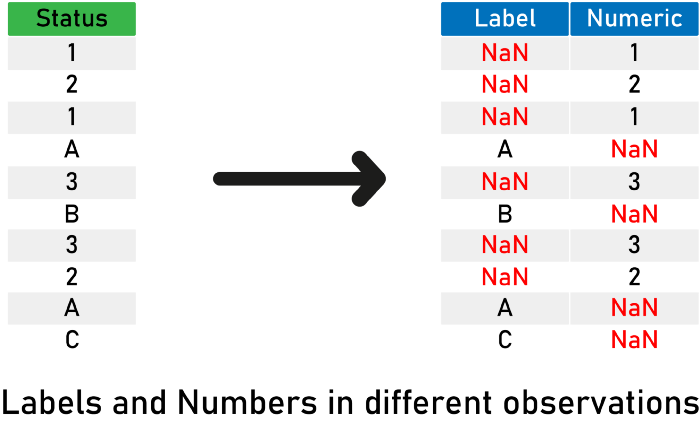

In [4]:

# import the needed packages
#import pandas as pd
#import numpy as np

# read your data
#data = pd.read_csv("yourData.csv")

# the mixed column and the results.
#mixed = "your mixed column"
#mixed_num = mixed + "_numerical"
#mixed_label = mixed + "_label"

# extract numerical part of the mixed variable.
#data[mixed_num] = pd.to_numeric(data[mixed], errors='coerce', downcast='integer')

# extract the categorical part of the mixed variable.
#data[mixed_label] = np.where(data[mixed_num].isnull(), data[mixed], np.nan)

The to_numeric function will extract the field as a numerical variable, and if an error occurs (when it encounters the categorical values) the error = ’ceorce’ will make the function return NaN.

## (2) Labels and numbers in the same observation

In which variables contain both numbers and labels in their values—here’s an illustration of this case before and after engineering it:

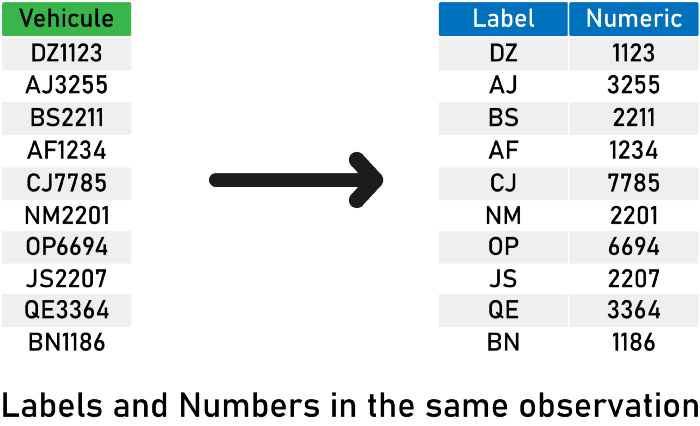

In [5]:
# import the needed packages
#import pandas as pd
#import numpy as np

# read your data
#data = pd.read_csv("yourData.csv")

# the mixed column and the results.
#mixed = "your mixed column"
#mixed_num = mixed + "_numerical"
#mixed_label = mixed + "_label"

# extract any digits
#data[mixed_num] = data[mixed].str.extract('(\d+)') 

# extract the first two letters
#data[mixed_label] = data[mixed].str[:2]

In [6]:
import re

txt = "The rain in Spain"
x = re.findall("ai", txt)
print(x)

['ai', 'ai']


A useful technique called Regular Expression (commonly referred to as regex) can help you detect patterns in mixed variables and easily extract categorical and numerical parts — worth checking out!


### Cyclical Feature Problem

In the time and date engineering methods explored above, we missed an essential characteristic of these features—periodicity.

Take for example 24-hour times 22:15 and 04:15—which one is closest to00:15? The answer is obvious, of course: 22:30, with a difference of only 2 hours, whereas 04:15 is 4 hours away.

The issue is that our models will say that 04:15 is closer, which is true in raw numerical terms—but not in 24-hour time. As feature engineers, it’s our responsibility to fix such an issue.

In [7]:
#### Learn more about Cyclic feature 

#### Advance technique also refer to that page
https://heartbeat.fritz.ai/hands-on-with-feature-engineering-advanced-methods-in-python-for-machine-learning-e05bf12da06a

# Forecasting Timeseries Data Using Facebook FBProphet

In [2]:
#!pip install pystan==2.17
#!pip3 install fbprophet==0.2
#import pandas as pd
#import fbprophet
#import matplotlib.pyplot as plt
#%matplotlib inline